Итого 7 человек заполнили опрос. В файлах categoria1.txt, categoria2.txt, .. categoria7.txt в одной строке записана одна категория, которая по мнению опрашиваемого считается за подарок. Посмотрим сначала на данные

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
num_of_answers = 7 # потому что есть 7 результатов опроса

In [13]:
# импортируем все подкатегории
f = open('categoria.txt', encoding='utf-8')
str_subcategories = f.read().split("\n")
num_of_subcategories = len(str_subcategories)
str_subcategories

['Смартфоны и умные часы',
 'Портативная техника',
 'Аудио- и видеотехника',
 'Всё для геймеров',
 'Фото- и видеокамеры',
 'Умный дом',
 'Робототехника и Stem-игрушки',
 'Игры и приставки',
 'GPS-навигация',
 'Крупная техника для кухни',
 'Пылесосы и аксессуары',
 'Техника для дома',
 'Климатическая техника',
 'Встраиваемая техника',
 'Мелкая техника для кухни',
 'Техника для красоты',
 'Умный дом',
 'Аудио- и видеотехника',
 'Ноутбуки и настольные ПК',
 'Комплектующие',
 'Периферийные устройства',
 'Оргтехника',
 'Расходные материалы',
 'Накопители данных',
 'Аксессуары',
 'Сетевое оборудование',
 'Программное обеспечение',
 'Инструменты',
 'Сантехника',
 'Материалы',
 'Электрика',
 'Отопление и вентиляция',
 'Двери, окна и скобяные изделия',
 'Строительная техника',
 'Водоснабжение',
 'Игрушки и игры',
 'Коляски и автокресла',
 'Детское питание и кормление',
 'Подгузники и гигиена',
 'Детский спорт',
 'Детская комната',
 'Развитие и обучение',
 'Товары для мам',
 'Шины и диски',
 'Эл

In [14]:
choice_subcat = np.zeros((num_of_answers, num_of_subcategories)) 
# если объект встретится в файле то будет 1 в соответствующей клетке

In [15]:
# input i это число от 1 до 7, так как результаты опроса лежат в файлах categoria1.txt, categoria2.txt и т.д
def read_to_choice(num):
    name = "categoria" + str(num) + ".txt"
    f = open(name, encoding='utf-8')
    ans = f.read()
    ans = ans.split('\n')
    ans = list(set(ans))
    for i in ans:
        if i in str_subcategories:
            choice_subcat[num-1][str_subcategories.index(i)] = 1
        else:
            print("error!! there is no <" + str(i)+'> in our file' + str(num))

In [19]:
for i in range(1,8):
    read_to_choice(i)

In [20]:
sums = choice_subcat.sum(axis=0)
sums

array([6., 3., 5., 3., 3., 1., 4., 5., 3., 2., 1., 4., 1., 0., 1., 3., 0.,
       0., 5., 0., 1., 1., 0., 2., 7., 0., 2., 2., 0., 0., 1., 0., 1., 1.,
       0., 6., 4., 0., 1., 1., 0., 2., 2., 2., 3., 0., 3., 3., 4., 3., 2.,
       6., 3., 2., 1., 2., 1., 0., 0., 1., 1., 4., 4., 3., 4., 4., 3., 6.,
       5., 1., 2., 4., 4., 4., 6., 1., 2., 0., 0., 1., 1., 1., 0., 0., 3.,
       3., 3., 0., 0., 0., 0., 0., 0., 5., 6., 1., 3., 0., 5., 1., 5., 0.,
       0., 0., 1., 3., 0., 1., 0., 2., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       2., 1., 1., 1., 0., 0., 5., 7., 6., 2., 6., 0., 3., 1., 3., 0., 4.,
       4., 2., 4., 4., 4., 3., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

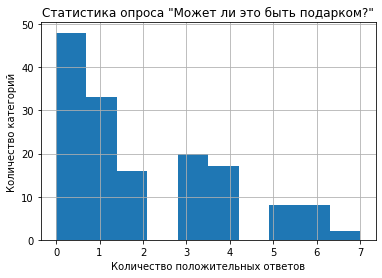

In [22]:
fig, ax = plt.subplots()

ax.hist(sums, range = [0, 7])

ax.set_title('Статистика опроса "Может ли это быть подарком?"')
ax.set_xlabel('Количество положительных ответов')
ax.set_ylabel('Количество категорий')
ax.grid()

plt.show()

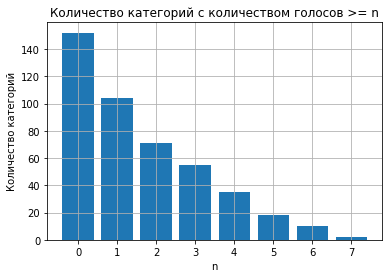

In [24]:
a = []
for i in range(8):
    a.append(len(np.where(sums >= i)[0]))
    
fig, ax = plt.subplots()

ax.bar(range(0, 8), a)

ax.set_title('Количество категорий с количеством голосов >= n')
ax.set_xlabel('n')
ax.set_ylabel('Количество категорий')
ax.grid()

plt.show()

Внимательным взглядом подумав решаем брать за подарок те категории что заработали >=3 голосов. Итого 55 категорий

In [26]:
print("категорий с голосами >=3: " + str(len(np.where(sums >= 3)[0])))

категорий с голосами >=3: 55


Исключаем повторные, на которые указали в опросе: 47 категорий

In [27]:
remove_cats = ['Товары для красоты',  'Спорт и отдых', 'Товары для дома', 'Бытовая техника', 'Компьютерная техника', 'Детские товары','Авто', 'Электроника']
chosen_categories = [str_subcategories[i] for i in np.where(sums >= 3)[0]]
for i in remove_cats:
    chosen_categories.remove(i)
len(chosen_categories)

47

In [28]:
chosen_categories

['Смартфоны и умные часы',
 'Портативная техника',
 'Аудио- и видеотехника',
 'Всё для геймеров',
 'Фото- и видеокамеры',
 'Робототехника и Stem-игрушки',
 'Игры и приставки',
 'GPS-навигация',
 'Техника для дома',
 'Техника для красоты',
 'Ноутбуки и настольные ПК',
 'Аксессуары',
 'Игрушки и игры',
 'Коляски и автокресла',
 'Масла и технические жидкости',
 'Аксессуары и оборудование',
 'Автомобильные инструменты',
 'Противоугонные устройства',
 'Мототехника',
 'Мебель',
 'Велоспорт',
 'Самокаты',
 'Моноколеса и гироскутеры',
 'Скейтбординг',
 'Роликовые коньки',
 'Спортивная защита',
 'Туризм и отдых на природе',
 'Тренажеры и фитнес',
 'Уход за волосами',
 'Уход за лицом',
 'Уход за телом',
 'Парфюмерия',
 'Оптика',
 'Ортопедические изделия',
 'Массажеры',
 'Чай, кофе, какао',
 'Кондитерские изделия',
 'Здоровое питание',
 'Все для выпечки',
 'Алкоголь',
 'Сумки и чемоданы ',
 'Музыкальные инструменты',
 'Книги',
 'Игры для компаний',
 'Билеты',
 'Гадания и предсказания',
 'Квадроко

Проведен опрос! Загружаем его таким, какой он импортирован из гугл форм

In [30]:
import pandas as pd

opros = pd.read_csv("opros2.csv") 
opros.head()


,Timestamp,(Немного личных данных) Пол,Возраст,Семейное положение,Хобби/Увлечения/Рабочие интересы,[Смартфоны и умные часы],[Портативная техника],[Аудио- и видеотехника],[Всё для геймеров],[Фото- и видеокамеры],...,[Здоровое питание],[Все для выпечки],[Алкоголь],[Сумки и чемоданы],[Музыкальные инструменты],[Книги],[Игры для компаний],[Билеты],[Гадания и предсказания],[Квадрокоптеры]
0,26/05/2020 13:39:47,Жен,19,нет отношений,"Рукоделие, Компьютерные игры, Соцсети, Чтение ...",Norm,Good,Good,Wow!,Wow!,...,No,Good,Wow!,Norm,Wow!,Wow!,Wow!,Wow!,Wow!,No
1,26/05/2020 13:39:51,Жен,15,нет отношений,"Прогулки, Компьютерные игры, Соцсети, Чтение х...",Wow!,Wow!,Wow!,Good,Wow!,...,No,Wow!,NO,Norm,No,Wow!,Wow!,Wow!,NO,Wow!
2,26/05/2020 13:40:22,Жен,14,нет отношений,"Компьютерные игры, Соцсети, Рисование",Wow!,Good,Good,Wow!,Good,...,Norm,Norm,NO,Norm,Norm,Norm,Good,Good,Norm,Norm
3,26/05/2020 13:41:18,Жен,16,нет отношений,"Соцсети, Чтение художественной литературы, рис...",Good,Norm,Norm,NO,Norm,...,Good,Norm,Norm,No,NO,Wow!,Norm,Norm,No,NO
4,26/05/2020 13:44:26,Жен,17,нет отношений,"Компьютерные игры, Соцсети, рисование",No,Norm,Wow!,Wow!,Norm,...,Good,Norm,Norm,No,NO,No,No,Norm,NO,NO


Теперь надо все категориальные признаки заванхотить (one-hot) и вообще обработать

In [31]:
opros = opros.drop(columns=["Timestamp"])

In [32]:
opros=opros.replace(["Wow!", "Good", "Norm", "No", "NO"], [10, 8, 6, 0, 0]) 

In [33]:
opros = opros.rename(columns={"(Немного личных данных) Пол": "Sex"})

In [34]:
all_sexes = list(set(opros.Sex))
all_sexes.remove('Жен')
all_sexes.remove('Муж')
sexes_i_drop = all_sexes
opros=opros.replace(sexes_i_drop, "Муж") 
# да, всё, что не муж и не жен я сгружаю в муж. Дело в том что там не было содержательных ответов про гендеры, только пошутейки
# возможно добавлять вариант "другое" было ошибкой... в любом случае это всего 4 ответа

In [35]:
all_status = list(set(opros["Семейное положение"]))
all_status.remove("нет отношений")
all_status.remove('состою в отношениях')
all_status.remove('состою в браке')
opros=opros.replace(all_status, "нет отношений") 
# тут я так же всё "другое" сливаю в "нет отношений", потому что там были пошутейки и бессмыслица

In [36]:
# onehot пола и статуса 
y = pd.get_dummies(opros.Sex)
x = pd.get_dummies(opros["Семейное положение"])
#opros = opros.drop("Sex")
#pd.concat(pd.get_dummies(opros.Sex), opros.drop(columns=["Sex"]))
opros['Female'] = y['Жен']
opros['Male'] = y['Муж']
opros['Single'] = x["нет отношений"]
opros['In_relations'] = x["состою в отношениях"]
opros['Married'] = x['состою в браке']
opros.head(1)

,Sex,Возраст,Семейное положение,Хобби/Увлечения/Рабочие интересы,[Смартфоны и умные часы],[Портативная техника],[Аудио- и видеотехника],[Всё для геймеров],[Фото- и видеокамеры],[Робототехника и Stem-игрушки],...,[Книги],[Игры для компаний],[Билеты],[Гадания и предсказания],[Квадрокоптеры],Female,Male,Single,In_relations,Married
0,Жен,19,нет отношений,"Рукоделие, Компьютерные игры, Соцсети, Чтение ...",6,8,8,10,10,6,...,10,10,10,10,0,1,0,1,0,0


In [37]:
# всё то, что было загружено в увлечения, включая из строки "другое"
hobby = set([])
for i in opros["Хобби/Увлечения/Рабочие интересы"]:
    hobby.update(i.split(', '))

In [38]:
# то, что мы заванхотим
# кстати по крайней мере тут графа "другое" быа полезна, ибо пункты кино и рисование пришли оттуда, так как часто встречались
# остальные пункты были прописаны заранее в опросе

legal_hobby = ['автомобили','бьюти-практики',"рисование", "кино",'компьютерные игры','прогулки','рукоделие','садоводство','соцсети','спорт','чтение нон-фикшн/профессиональной литературы','чтение художественной литературы']

In [39]:
for j in legal_hobby:
    a = []
    for i in opros["Хобби/Увлечения/Рабочие интересы"]:
        if i.lower().find(j) != -1:
            a.append(1)
        else:
            a.append(0)
    opros[j] = a

In [40]:
# приводим опрос в порядок
cols = ['Female', 'Male', 'Возраст', 'Single', 'In_relations','Married', ' [Смартфоны и умные часы]',' [Портативная техника]', ' [Аудио- и видеотехника]',' [Всё для геймеров]', ' [Фото- и видеокамеры]',' [Робототехника и Stem-игрушки]', ' [Игры и приставки]',' [GPS-навигация]', ' [Техника для дома]', ' [Техника для красоты]',' [Ноутбуки и настольные ПК]', ' [Аксессуары]', ' [Игрушки и игры]',' [Коляски и автокресла]', ' [Масла и технические жидкости]',' [Аксессуары и оборудование]', ' [Автомобильные инструменты]',' [Противоугонные устройства]', ' [Мототехника]', ' [Мебель]',' [Велоспорт]', ' [Самокаты]', ' [Моноколеса и гироскутеры]',' [Скейтбординг]', ' [Роликовые коньки]', ' [Спортивная защита]',' [Туризм и отдых на природе]', ' [Тренажеры и фитнес]',' [Уход за волосами]', ' [Уход за лицом]', ' [Уход за телом]',' [Парфюмерия]', ' [Оптика]', ' [Ортопедические изделия]',' [Массажеры]', ' [Чай, кофе, какао]', ' [Кондитерские изделия]',' [Здоровое питание]', ' [Все для выпечки]', ' [Алкоголь]',' [Сумки и чемоданы]', ' [Музыкальные инструменты]', ' [Книги]',' [Игры для компаний]', ' [Билеты]', ' [Гадания и предсказания]',' [Квадрокоптеры]', 'автомобили', 'бьюти-практики', 'рисование', 'кино','компьютерные игры', 'прогулки', 'рукоделие', 'садоводство', 'соцсети','спорт', 'чтение нон-фикшн/профессиональной литературы','чтение художественной литературы']
opros = opros[cols]
opros.head()

,Female,Male,Возраст,Single,In_relations,Married,[Смартфоны и умные часы],[Портативная техника],[Аудио- и видеотехника],[Всё для геймеров],...,рисование,кино,компьютерные игры,прогулки,рукоделие,садоводство,соцсети,спорт,чтение нон-фикшн/профессиональной литературы,чтение художественной литературы
0,1,0,19,1,0,0,6,8,8,10,...,0,0,1,0,1,0,1,0,1,1
1,1,0,15,1,0,0,10,10,10,8,...,1,0,1,1,0,0,1,0,1,1
2,1,0,14,1,0,0,10,8,8,10,...,1,0,1,0,0,0,1,0,0,0
3,1,0,16,1,0,0,8,6,6,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0,17,1,0,0,0,6,10,10,...,1,0,1,0,0,0,1,0,0,0


In [41]:
opros.to_csv("final_opros.csv")

Теперь мы готовы обучать